In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import plotly.express as px
from plotly import graph_objects as go
from matplotlib.ticker import StrMethodFormatter
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

sns.set_theme(style="dark")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_pickle('feature_train.pkl')

In [3]:
x = df[df.columns.difference(['winPlacePerc'])]

In [4]:
x.head()

,DBNOs,assists,boosts,damageDealt,damage_per_distance,headshotKills,headshot_to_kill,heals,killPlace,killPoints,killStreaks,killplace_to_maxPlace,kills,lobby_size,longestKill,matchDuration,matchType_encoded,maxPlace,max_kill_team,max_kills_match,max_possible_kills,max_team_size_lobby,numGroups,players_in_match,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,team_kill_points,team_size,total_distance,total_distance_match,total_distance_per_kill,total_items_acquired,total_items_per_kill,total_kills_match,total_team_damage,total_team_distance,total_team_items,total_team_kills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0,0.00,0.00,0,0.00,0,60,1241,0,2.14,0,96,0.00,1306,15,28,4,7,92,8,26,96,-1,0,0.00,0,0.00,0,5002,4,244.80,97713.59,0.00,1,0.00,84,408.75,731.96,5,4,0,244.80,1,1466
1,0,0,0,91.47,0.06,0,0.00,0,57,0,0,2.19,0,91,0.00,1777,15,26,2,7,87,10,25,91,1484,0,0.00,0,11.04,0,0,4,1445.04,212305.61,0.00,5,0.00,83,571.27,20370.04,43,4,0,1434.00,5,0
2,0,1,0,68.00,0.42,0,0.00,0,47,0,0,0.94,0,98,0.00,1318,2,50,2,9,96,6,47,98,1491,0,0.00,0,0.00,0,0,2,161.80,101769.67,0.00,2,0.00,91,214.60,1621.20,9,2,0,161.80,2,0
3,0,0,0,32.90,0.16,0,0.00,0,75,0,0,2.42,0,91,0.00,1436,15,31,0,7,90,8,30,91,1408,0,0.00,0,0.00,0,0,1,202.70,123545.82,0.00,3,0.00,82,32.90,202.70,3,0,0,202.70,3,0
4,0,0,0,100.00,2.01,0,0.00,0,45,0,1,0.46,1,97,58.53,1424,13,97,1,11,96,2,95,97,1560,0,0.00,0,0.00,0,0,1,49.75,93617.06,49.75,2,2.00,91,100.00,49.75,2,1,0,49.75,2,0


In [5]:
y = df.winPlacePerc

In [6]:
ss = StandardScaler()
xs = ss.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3, random_state=20)

In [8]:
ln = LinearRegression()
ln.fit(x_train, y_train)
ln_scores = cross_val_score(ln, x_train, y_train, cv=10)

print(ln_scores)
print(np.mean(ln_scores))

[0.8679318  0.86830157 0.86720938 0.86495221 0.86782512 0.86594363
 0.86795096 0.866961   0.86892192 0.86775777]
0.8673755347478496


In [9]:
optimal_lasso = LassoCV(n_alphas=100, cv=10, verbose=1)
optimal_lasso.fit(x_train, y_train,)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0002492761995730044


In [10]:
lasso = LassoCV(n_alphas=1, cv=10)
lasso.fit(x_train, y_train)
lasso_scores = cross_val_score(lasso, x_train, y_train, cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))

[0.867574   0.86786273 0.86675977 0.86557007 0.86744362 0.86558841
 0.86755805 0.86656933 0.86843088 0.86736923]
0.8670726096637649


In [26]:
ridge_alphas = np.logspace(0, 5, 20)
print(ridge_alphas)
ridge_alphas
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x_train, y_train)

print(optimal_ridge.alpha_)

[1.00000000e+00 1.83298071e+00 3.35981829e+00 6.15848211e+00
 1.12883789e+01 2.06913808e+01 3.79269019e+01 6.95192796e+01
 1.27427499e+02 2.33572147e+02 4.28133240e+02 7.84759970e+02
 1.43844989e+03 2.63665090e+03 4.83293024e+03 8.85866790e+03
 1.62377674e+04 2.97635144e+04 5.45559478e+04 1.00000000e+05]
1.0


In [27]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(x_train, y_train)
ridge_scores = cross_val_score(ridge, x_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.8679324  0.86830556 0.86721473 0.86493406 0.86782324 0.86594676
 0.86794889 0.86696125 0.86892208 0.86776408]
0.8673753044040644


In [52]:
lasso.fit(x_train, y_train)
lasso_coefs = pd.DataFrame({'lasso_variable': x.columns, 'coef': lasso.coef_, \
                           'abs_coef': np.abs(lasso.coef_)})
lasso_coefs.head()
lasso_coefs.sort_values('abs_coef', ascending=False).head(10)

,lasso_variable,coef,abs_coef
8,killPlace,-0.20,0.20
43,walkDistance,0.10,0.10
10,killStreaks,-0.08,0.08
12,kills,-0.06,0.06
20,max_possible_kills,0.04,0.04
33,total_distance_match,-0.04,0.04
18,max_kill_team,0.04,0.04
31,team_size,-0.03,0.03
40,total_team_items,0.03,0.03
32,total_distance,0.02,0.02


In [51]:
ridge.fit(x_train, y_train)
ridge_coefs = pd.DataFrame({'ridge_variable': x.columns, 'coef': ridge.coef_, \
                           'abs_coef': np.abs(ridge.coef_)})
ridge_coefs.head()
ridge_coefs.sort_values('abs_coef', ascending=False).head(10)

,ridge_variable,coef,abs_coef
8,killPlace,-0.20,0.20
43,walkDistance,0.09,0.09
10,killStreaks,-0.08,0.08
45,winPoints,0.08,0.08
12,kills,-0.06,0.06
24,rankPoints,0.04,0.04
32,total_distance,0.04,0.04
33,total_distance_match,-0.04,0.04
31,team_size,-0.04,0.04
18,max_kill_team,0.04,0.04


In [31]:
print(np.sum(lasso.coef_ == 0))
print(len(lasso.coef_))
np.sum(lasso.coef_ == 0) / float(len(lasso.coef_))

7
46


0.15217391304347827

In [53]:
lasso_coefs[lasso_coefs.coef == 0].reset_index(drop=True)

,lasso_variable,coef,abs_coef
0,lobby_size,0.00,0.00
1,maxPlace,0.00,0.00
2,players_in_match,0.00,0.00
3,rankPoints,0.00,0.00
4,rideDistance,0.00,0.00
5,total_items_acquired,0.00,0.00
6,total_team_kills,-0.00,0.00


In [54]:
ridge_coefs[ridge_coefs.abs_coef < 0.004].reset_index(drop=True)

,ridge_variable,coef,abs_coef
0,assists,-0.00,0.00
1,damage_per_distance,-0.00,0.00
2,longestKill,0.00,0.00
3,max_kills_match,-0.00,0.00
4,revives,0.00,0.00
5,roadKills,0.00,0.00
6,swimDistance,0.00,0.00
7,teamKills,-0.00,0.00
8,team_kill_points,0.00,0.00
9,total_kills_match,-0.00,0.00


In [38]:
ridge_coefs.sort_values('abs_coef', ascending=False)

,variable,coef,abs_coef
8,killPlace,-0.20,0.20
43,walkDistance,0.09,0.09
10,killStreaks,-0.08,0.08
45,winPoints,0.08,0.08
12,kills,-0.06,0.06
24,rankPoints,0.04,0.04
32,total_distance,0.04,0.04
33,total_distance_match,-0.04,0.04
31,team_size,-0.04,0.04
18,max_kill_team,0.04,0.04


In [25]:
rf = RandomForestRegressor(n_estimators=20, min_samples_split=5)
rf.fit(x_train, y_train)
rf_scores = cross_val_score(rf, x_train, y_train, cv=5)

print(rf_scores)
print(np.mean(rf_scores))

[0.95245499 0.95223031 0.95213999 0.95222613 0.95218638]
0.9522475616624467


In [27]:
ar = AdaBoostRegressor(n_estimators=20)
ar.fit(x_train, y_train)
ar_scores = cross_val_score(ar, x_train, y_train, cv=10)

print(ar_scores)
print(np.mean(ar_scores))

[0.8394444  0.8339454  0.83352621 0.84760012 0.83670675 0.836571
 0.84151567 0.83610991 0.83970872 0.83694347]
0.8382071653050728


In [28]:
gr = GradientBoostingRegressor(n_estimators=20, min_samples_split=5)
gr.fit(x_train, y_train)
gr_scores = cross_val_score(gr, x_train, y_train, cv=10)

print(gr_scores)
print(np.mean(gr_scores))

[0.84545122 0.84509473 0.84360318 0.84328745 0.84376482 0.84383271
 0.84330869 0.84319315 0.84468763 0.84404071]
0.8440264300799895


In [20]:
# normalizing predicitons into prediction range of 0 - 1

y_pred_lin = np.minimum(1, np.maximum(0., ln.predict(x_test)))
y_pred = np.minimum(1, np.maximum(0., ridge.predict(x_test)))
y_pred_lasso = np.minimum(1, np.maximum(0., lasso.predict(x_test)))

In [29]:
y_pred_rf = rf.predict(x_test)
y_pred_ar = ar.predict(x_test)
y_pred_gr = gr.predict(x_test)

In [21]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('mse', mean_squared_error(y_test, y_pred_lasso))
print('mae', mean_absolute_error(y_test, y_pred_lasso))

rmse 0.10807547798065201
mse 0.011680308940746398
mae 0.07971808515710846


In [22]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred)))
print('mse', mean_squared_error(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))

rmse 0.10774322066878779
mse 0.0116086016000831
mae 0.0793680198864057


In [23]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_lin)))
print('mse', mean_squared_error(y_test, y_pred_lin))
print('mae', mean_absolute_error(y_test, y_pred_lin))

rmse 0.10774300676266507
mse 0.011608555506259692
mae 0.07936524823026314


In [30]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_rf)))
print('mse', mean_squared_error(y_test, y_pred_rf))
print('mae', mean_absolute_error(y_test, y_pred_rf))

rmse 0.06643064791245394
mse 0.004413030982068421
mae 0.047361313290645704


In [31]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_ar)))
print('mse', mean_squared_error(y_test, y_pred_ar))
print('mae', mean_absolute_error(y_test, y_pred_ar))

rmse 0.12461532643410152
mse 0.01552897958227768
mae 0.09914548388447685


In [32]:
# rmse vs mse vs mae

print('rmse', sqrt(mean_squared_error(y_test, y_pred_gr)))
print('mse', mean_squared_error(y_test, y_pred_gr))
print('mae', mean_absolute_error(y_test, y_pred_gr))

rmse 0.12109496566358606
mse 0.014663990709065086
mae 0.09398658613866678


In [33]:
print("Random forest regressor with the best accuracy 95%, lowest root mean squared error, mean squared error, and mean absolute error")

Random forest regressor with the best accuracy 95%, lowest root mean squared error, mean squared error, and mean absolute error


In [34]:
print("The features engineered improved accuracy on all models used and reduced errors except in the the case of the adaboost regressor where mean absolute error is 3 thousandths higher")

The features engineered improved accuracy on all models used and reduced errors except in the the case of the adaboost regressor where mean absolute error is 3 thousandths higher


In [71]:
columns = ["R-Square", "Root MSE", "MSE", "MAE"]
rows = ["Linear Regression", "LassoCV", "RidgeCV", "Random Forest", "Ada Boost", "Gradient Boost"]
data = np.array([[np.mean(ln_scores), sqrt(mean_squared_error(y_test, y_pred_lin)), mean_squared_error(y_test, y_pred_lin), mean_absolute_error(y_test, y_pred_lin)], 
                 [np.mean(lasso_scores), sqrt(mean_squared_error(y_test, y_pred_lasso)), mean_squared_error(y_test, y_pred_lasso), mean_absolute_error(y_test, y_pred_lasso)], 
                 [np.mean(ridge_scores), sqrt(mean_squared_error(y_test, y_pred)), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)], 
                 [np.mean(rf_scores), sqrt(mean_squared_error(y_test, y_pred_rf)), mean_squared_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf)], 
                 [np.mean(ar_scores), sqrt(mean_squared_error(y_test, y_pred_ar)), mean_squared_error(y_test, y_pred_ar), mean_absolute_error(y_test, y_pred_ar)], 
                 [np.mean(gr_scores), sqrt(mean_squared_error(y_test, y_pred_gr)), mean_squared_error(y_test, y_pred_gr), mean_absolute_error(y_test, y_pred_gr)]]) 
result = pd.DataFrame(data=data, index=rows, columns=columns)

Model Results

In [73]:
result

,R-Square,Root MSE,MSE,MAE
Linear Regression,0.87,0.11,0.01,0.08
LassoCV,0.87,0.11,0.01,0.08
RidgeCV,0.87,0.11,0.01,0.08
Random Forest,0.95,0.07,0.00,0.05
Ada Boost,0.84,0.12,0.02,0.10
Gradient Boost,0.84,0.12,0.01,0.09


Understanding Feature Importance

Global Importance

In [77]:
features_ranking = pd.Series(rf.feature_importances_, index=x.columns)

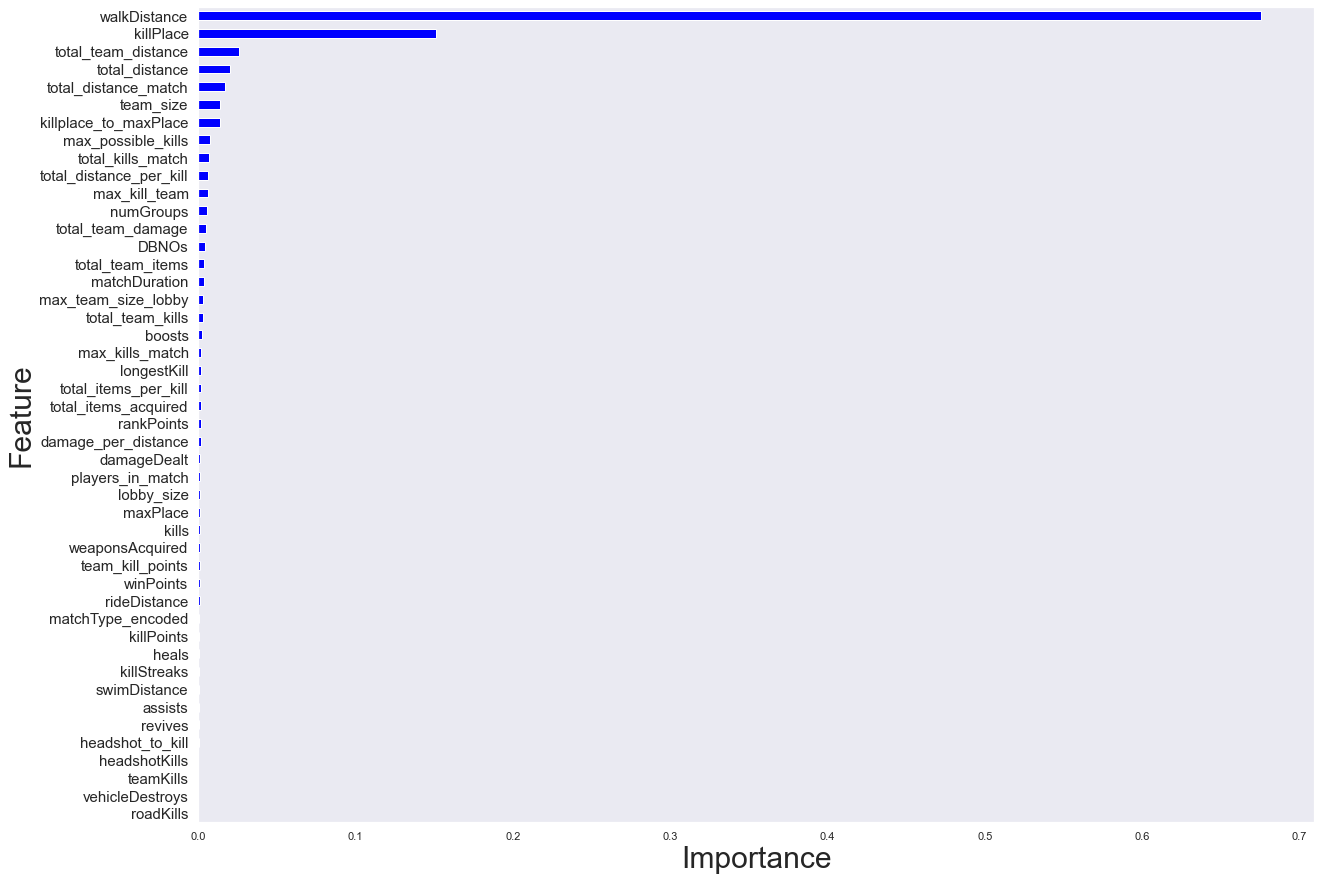

In [104]:
plt.figure(figsize=(20,15))
features_ranking.sort_values(ascending=True, inplace=True)
features_ranking.plot.barh(color='blue')
plt.xlabel("Importance", fontsize=30)
plt.ylabel("Feature", fontsize=30)
plt.yticks(fontsize=15)
plt.savefig('rf_feature_ranking')
plt.show()
# plt.title("Global Feature Importance - Built-in Method")

Permutation Importance

In [105]:
# Took too long
# perm = permutation_importance(rf, x_test, y_test, n_repeats=10, random_state=20)

# perm_importances = perm.importances_mean
# perm_std = perm.importances_std
# sorted_id = perm_importances.argsort()
# feature_names = x.columns

In [106]:
# pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_id]).sort_values('Importance',ascending=True)

In [ ]:
import shap

explainer = shap.Explainer(rf)
shap_values = explainer(x_train)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
# Decision tree 

from treeinterpreter import treeinterpreter as ti

prediction, bias, contributions = ti.predict(rf, x_train)

In [ ]:
pd.Series(np.mean(contributions, axis=0), index=x_train.columns).sort_values(ascending=True).plot.barh(color='green')

In [ ]:
# For test
prediction, bias, contributions = ti.predict(rf, x_test)

pd.Series(contributions[0], index=X_test.columns).sort_values(ascending=True).plot.barh(color='green')

In [ ]:
# Check for data leakage by excluding our top two features and seeing if model gets worse or improves without them